# ***FPR and AUC Analysis***

# ⚙️ Functions and Settings

## 📊 [ **FPR or AUC** ] barchart combined

In [297]:
import matplotlib.pyplot as plt
import numpy as np


def combined_plot(auc_total, auc_white, auc_black, auc_other, auc_male, auc_female, TITLE, fpr_or_auc):

    
        
    # Set figure size
    plt.figure(figsize=(5, 5))

    # Setting up the data for the bars
    x = ["", "Total", "", "White", "Black", "Other", "", "Male", "Female"]
    y = [None, auc_total, None, auc_white, auc_black, auc_other, None, auc_male, auc_female]

    # Colors 
    colors = ["", "green", "", "white", "black", "blue", "", "#3274A1", "#E1812C"]
    edgecolors = ["", "black", "", "black", "black", "black", "", "#3274A1", "#E1812C"]
    # Plot the bars
    for i in range(len(x)):
        if y[i] is not None:  
            plt.bar(i, y[i], color=colors[i], edgecolor=edgecolors[i])

    # Add value labels under the bars
    for i in range(len(x)):
        if y[i] is not None:  
            plt.text(i, y[i] + 0.0025, f"{y[i]:.4f}", ha='center')

    # Add grid, labels, big title
    plt.grid(axis='y', linestyle='--', color='grey', alpha=0.5)
    plt.title(f"{fpr_or_auc} for {TITLE}", fontsize=14)
    plt.xlabel("")
    plt.ylabel(f"{fpr_or_auc}")
    if fpr_or_auc == "FPR":
        plt.ylim(0.15, 0.35)
    elif fpr_or_auc == "AUC":
        plt.ylim(0.7, 0.9)

    # Adjust x-axis labels
    plt.xticks(range(len(x)), x, rotation=0)

    # Show plot
    plt.tight_layout()
    plt.show()



## ⚙️ Setting up labels and probabilities


final_mimic_05_syn_all  50  

FPR_FILE_NAME = "FPR_MIMIC_50SYN"

### ⚙️ Choose the training experiment results i.e, name of results folder  and (the title on the plots) 
For Example:  
  
Real Data ---
- "final_mimic_real_all"    (For MIMIC only)  
- "final_chexpert_all"      (For CheXpert only)  
- "final_mimic_chexpert_all"(For MIMIC + CheXpert only) 

Synthetic ---
- "final_syn_all"           (For Synthetic only)  
- "final_mimic_syn_all"     (For MIMIC + Synthetic)
- "final_chexpert_syn_all"  (For CheXpert + Synthetic)  
- "final_mimic_075_syn_all" (For MIMIC + 75% SYN) 
- "final_mimic_05_syn_all"  (For MIMIC + 50% SYN)  
- "final_mimic_025_syn_all" (For MIMIC + 25% SYN) 
- "final_mimic_10_syn_all"  (For MIMIC + 10% SYN) 
- "final_mimic_5_syn_all"   (For MIMIC + 5% SYN)   
- "final_mimic_01_syn_all"  (For MIMIC + 1% SYN)  


and the  

plot_title for the plot function

In [298]:
exp_type = "final_syn_all"

plot_title = "Synthetic only"

# the FPR and AUC json file names

FPR_FILE_NAME = "FPR_SYNTH"

AUC_FILE_NAME = "AUC_SYNTH"

### ⚙️ Getting the corresponding labels and probabilities

In [299]:
# ---------------------------------------------------------------------------- #
#                                                                              #
#                                  [ THE CODE ]                                #
#                                                                              #
# ---------------------------------------------------------------------------- #


labels_val = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_val.npy')
pp_val = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_val.npy')
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')

label_names = [
    "Cardiomegaly"
    ,"Edema"
    ,"Consolidation"
    ,"Atelectasis"
    ,"Pleural Effusion"
    ,"No Finding"
]

## ⚙️ Apply threshold  

In [300]:
from metrics.metrics import find_best_threshold
# ---------------------------------------------------------------------------- #
#                                 get Threshold                                #
# ---------------------------------------------------------------------------- #
thresholds = find_best_threshold(pp_val, labels_val)


# 📝+📊 Fairness Analysis **(Races and Genders)** and Visualizations

## 1️⃣ **Setup and Configuration**
- Import required libraries.
- Set up initial configurations and paths.

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from metrics.metrics import calculate_roc_auc,find_best_threshold, calculate_fpr_fnr

## 2️⃣ **Dataset Preparation**

### 2.1 Load Test Dataset
- Load the test dataset (`mimic_test_csv`).
- Filter for frontal images if specified (`use_frontal: True`).

### 2.2 Create Patient ID 🆔
- Extract `subject_id` from the file paths.
- Process the IDs to make them usable for merging.

In [302]:
# ---------------------------------------------------------------------------- #
#                                   RACE                                       #
# ---------------------------------------------------------------------------- #

# -------------------------------- Explore Race ------------------------------ #
# get csvs
mimic_test_csv = pd.read_csv('/local/home/rezajam/project/med-stable-diffusion/data/csv/mimic/mimic_test.csv')
# mimic_test_csv = pd.read_csv('/local/home/rezajam/fairness_on_embeddings/results-backup/mimic_test.csv')
# use_frontal: True
# mimic_test_csv = mimic_test_csv[mimic_test_csv["Frontal/Lateral"] == "Frontal"]


# --------------------------------- CREATE ID -------------------------------- #
# CREATE ID from Path 'p' from p231434 
# add the patient_id from /.../p12313/...:
mimic_test_csv['subject_id'] = mimic_test_csv['Path'].apply(lambda x: x.split('/')[2])
# remove 'p' from p231434
mimic_test_csv['subject_id'] = mimic_test_csv['subject_id'].apply(lambda x: x.split('p')[1]).astype(int)
mimic_test_csv


,Path,Atelectasis,Cardiomegaly,Consolidation,Edema,Pleural Effusion,No Finding,Frontal/Lateral,split,train/val/test,subject_id
0,files/p19/p19475214/s50795646/56370e38-cc33f33...,NaN,1.0,NaN,NaN,NaN,NaN,Frontal,p19,test,19475214
1,files/p19/p19475214/s50795646/50174d0f-2558bcf...,NaN,1.0,NaN,NaN,NaN,NaN,Lateral,p19,test,19475214
2,files/p19/p19565843/s54739671/18d00135-12bbef2...,NaN,NaN,NaN,NaN,NaN,1.0,Lateral,p19,test,19565843
3,files/p19/p19565843/s54739671/f84df8cb-05b220f...,NaN,NaN,NaN,NaN,NaN,1.0,Frontal,p19,test,19565843
4,files/p19/p19623993/s57012563/839682a6-30ec6c4...,NaN,NaN,NaN,NaN,NaN,1.0,Frontal,p19,test,19623993
...,...,...,...,...,...,...,...,...,...,...,...
37643,files/p19/p19560160/s52559907/372da885-622921e...,NaN,NaN,NaN,NaN,NaN,1.0,Lateral,p19,test,19560160
37644,files/p19/p19560160/s55462975/49bb3e40-8a077e9...,NaN,NaN,NaN,NaN,NaN,1.0,Lateral,p19,test,19560160
37645,files/p19/p19560160/s55462975/077a1497-e0a0c73...,NaN,NaN,NaN,NaN,NaN,1.0,Frontal,p19,test,19560160
37646,files/p19/p19256476/s54932183/02a3e765-aa81476...,NaN,NaN,NaN,NaN,NaN,1.0,Lateral,p19,test,19256476


## 3️⃣ **Incorporate Demographics Data 📋**

### 3.1 Add Race Information 
- Load admissions data to map `subject_id` to `race`.
- Merge `race` data into the test dataset.

### 3.2 Validate Dataset Integrity
- Ensure the dataset's length remains consistent after merging.
- Verify the correspondence between `labels_test` and `mimic_test_csv`.

In [303]:
# --------------------------------- ADD RACE --------------------------------- #

# ------------ ADD RACE from merging admissions id to the mimic id ----------- #
mimic_admissions =  pd.read_csv('/local/data/physionet.org/files/mimiciv/2.2/hosp/admissions.csv')
# Ensure mimic_admissions has no duplicate subject_id rows
mimic_admissions = mimic_admissions.drop_duplicates(subset='subject_id')
# Create a mapping from subject_id to race
id_to_race = mimic_admissions.set_index('subject_id')['race']
# Add the race column to mimic_test_csv based on subject_id mapping
mimic_test_csv['race'] = mimic_test_csv['subject_id'].map(id_to_race)
# Verify the lengths remain unchanged

print("Labels size:", labels_test.shape[0])
print("Testing dataset size:", mimic_test_csv.shape[0])
assert len(labels_test) == len(mimic_test_csv), "Length mismatch detected!"
# mimic_test_csv
mimic_test_csv1 = mimic_test_csv.copy()

Labels size: 37648
Testing dataset size: 37648


## 4️⃣ **Race-based Analysis 🌍**


### 4.1 Overall Performance
- Compute ROC-AUC, FPR, and FNR for the entire dataset.

In [304]:
# ---------------------------------------------------------------------------- #
#                       [Race] Label-Probability Analysis                      #
# ---------------------------------------------------------------------------- #

# ----------------------------------- TOTAL ---------------------------------- #
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')
mimic_test_csv = mimic_test_csv1.copy()

label_all = {}
pp_all = {}
label_all = labels_test
pp_all = pp_test
__, __, my_auc_all = calculate_roc_auc(pp_all, label_all)

fpr_all, fnr_all = calculate_fpr_fnr(pp_all, label_all, thresholds)
# my_auc_all = {}
# for i in range(label_all.shape[1]):
#     my_auc_all[i] = roc_auc_score(label_all[:, i], pp_all[:, i])

### 4.2 Analyze by Race

#### ⬜ White Population 
- Filter for `WHITE` and related subcategories.
- Compute metrics: ROC-AUC, FPR, and FNR.

In [305]:
# ----------------------------------- WHITE ---------------------------------- #
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')
mimic_test_csv = mimic_test_csv1.copy()

white_related = [
    'WHITE',
    'WHITE - RUSSIAN',
    'WHITE - OTHER EUROPEAN',
    'WHITE - BRAZILIAN',
    'WHITE - EASTERN EUROPEAN'
]
label_white = {}
pp_white = {}
mimic_test_csv = mimic_test_csv1.copy()
label_white = labels_test[mimic_test_csv['race'].isin(white_related)]
mimic_test_csv = mimic_test_csv1.copy()
pp_white = pp_test[mimic_test_csv['race'].isin(white_related)]
__, __, my_auc_white = calculate_roc_auc(pp_white, label_white)


fpr_white, fnr_white = calculate_fpr_fnr(pp_white, label_white, thresholds)
# my_auc_white = {}
# for i in range(label_white.shape[1]):
#     my_auc_white[i] = roc_auc_score(label_white[:, i], pp_white[:, i])

#### ⬛ Black Population 
- Filter for `BLACK/AFRICAN AMERICAN` and related subcategories.
- Compute metrics: ROC-AUC, FPR, and FNR.

In [306]:
# ----------------------------------- BLACK ---------------------------------- #
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')
mimic_test_csv = mimic_test_csv1.copy()

black_related = [
    'BLACK/AFRICAN AMERICAN',
    'BLACK/CAPE VERDEAN',
    'BLACK/AFRICAN',
    'BLACK/CARIBBEAN ISLAND'
]
label_black = {}
pp_black = {}
mimic_test_csv = mimic_test_csv1.copy()
label_black = labels_test[mimic_test_csv['race'].isin(black_related)]
mimic_test_csv = mimic_test_csv1.copy()
pp_black = pp_test[mimic_test_csv['race'].isin(black_related)]
__, __, my_auc_black = calculate_roc_auc(pp_black, label_black)


fpr_black, fnr_black = calculate_fpr_fnr(pp_black, label_black, thresholds)

# my_auc_black = {}
# for i in range(label_black.shape[1]):
#     my_auc_black[i] = roc_auc_score(label_black[:, i], pp_black[:, i])

#### 🟦 Other Races 
- Filter for races not included in `WHITE` or `BLACK`.
- Compute metrics: ROC-AUC, FPR, and FNR.

In [307]:
# ----------------------------------- OTHER ---------------------------------- #
label_other = {}
pp_other = {}
other_race_mask = ~mimic_test_csv['race'].isin(black_related + white_related)
mimic_test_csv = mimic_test_csv1.copy()
label_other = labels_test[other_race_mask]
mimic_test_csv = mimic_test_csv1.copy()
pp_other = pp_test[other_race_mask]
__, __, my_auc_other = calculate_roc_auc(pp_other, label_other)


fpr_other, fnr_other = calculate_fpr_fnr(pp_other, label_other, thresholds)


## 5️⃣ **Incorporate Gender Data 👩‍🦰👨‍🦱**


### 5.1 Add Gender Information
- Load patient demographic data to map `subject_id` to `gender`.
- Merge `gender` data into the test dataset.

### 5.2 Validate Dataset Integrity ✅
- Ensure the dataset's length remains consistent after merging.

In [308]:
# ---------------------------------------------------------------------------- #
#                                   GENDER                                     #
# ---------------------------------------------------------------------------- #
mimic_patients =  pd.read_csv('/local/data/physionet.org/files/mimiciv/2.2/hosp/patients.csv')

mimic_patients = mimic_patients.drop_duplicates(subset='subject_id')
mimic_patients
# Create a mapping from subject_id to race
id_to_race = mimic_patients.set_index('subject_id')['gender']
# Add the race column to mimic_test_csv based on subject_id mapping
mimic_test_csv['gender'] = mimic_test_csv['subject_id'].map(id_to_race)
# Verify the lengths remain unchanged

print("Labels size:", labels_test.shape[0])
print("Testing dataset size:", mimic_test_csv.shape[0])
assert len(labels_test) == len(mimic_test_csv), "Length mismatch detected!"

Labels size: 37648
Testing dataset size: 37648


## 6️⃣ **Gender-based Analysis 👩‍🦰👨‍🦱**


### Male Population
- Filter for `M` (male) gender.
- Compute metrics: ROC-AUC, FPR, and FNR.

### Female Population
- Filter for `F` (female) gender.
- Compute metrics: ROC-AUC, FPR, and FNR.


In [309]:
# ----------------------------------- MALE ----------------------------------- #
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')

label_male = {}
pp_male = {}
label_male = labels_test[mimic_test_csv['gender'] == "M"]
pp_male = pp_test[mimic_test_csv['gender'] == "M"]
__, __, my_auc_male = calculate_roc_auc(pp_male, label_male)


fpr_male, fnr_male = calculate_fpr_fnr(pp_male, label_male, thresholds)

# ----------------------------------- FEMALE --------------------------------- #
labels_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/labels_test.npy')
pp_test = np.load(f'/local/home/rezajam/fairness_on_embeddings/results/{exp_type}/probabilities/probabilities_test.npy')

label_female = {}
pp_female = {}
label_female = labels_test[mimic_test_csv['gender'] == "F"]
pp_female = pp_test[mimic_test_csv['gender'] == "F"]
__, __, my_auc_female = calculate_roc_auc(pp_female, label_female)


fpr_female, fnr_female = calculate_fpr_fnr(pp_female, label_female, thresholds)



## 7️⃣ **Visualizations 📊**



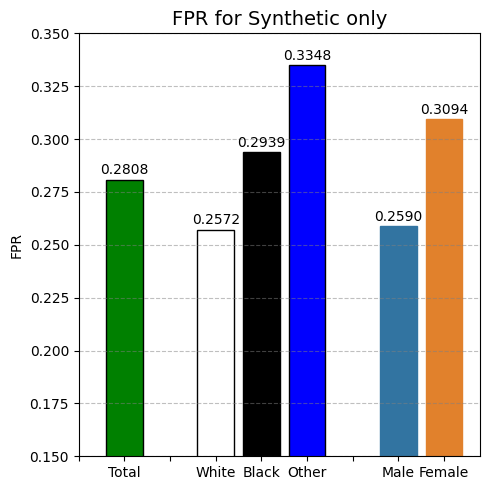

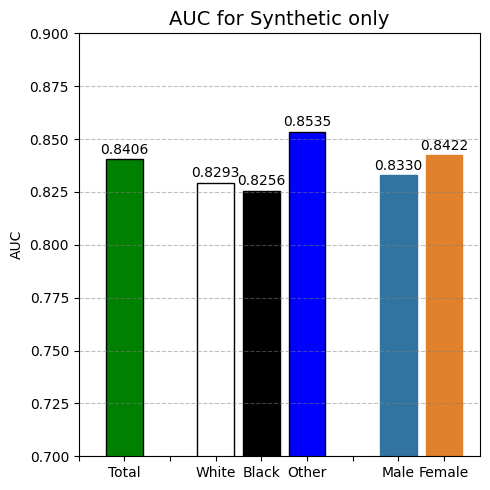

In [310]:
# FPR
combined_plot(fpr_all[5], fpr_white[5], fpr_black[5], fpr_other[5], fpr_male[5], fpr_female[5], plot_title, "FPR")

# AUC
combined_plot(my_auc_all[5], my_auc_white[5], my_auc_black[5], my_auc_other[5], my_auc_male[5], my_auc_female[5], plot_title, "AUC")

# Export (FPR) to JSON 📄

In [140]:
import json

# FPR_FILE_NAME = "FPR_MIMIC_CHEXPERT"
# label_names = [
#     "Cardiomegaly"
#     ,"Edema"
#     ,"Consolidation"
#     ,"Atelectasis"
#     ,"Pleural Effusion"
#     ,"No Finding"
# ]

fprs = {
    "fpr_all": fpr_all,
    "fpr_white": fpr_white,
    "fpr_black": fpr_black,
    "fpr_other": fpr_other,
    "fpr_male": fpr_male,
    "fpr_female": fpr_female
}
fprs["fpr_all"]
# Export to a JSON file
with open(f"/local/home/rezajam/fairness_on_embeddings/FINAL_ANALYSIS/{FPR_FILE_NAME}_last.json", "w") as json_file:
    json.dump(fprs, json_file, indent=4)

# Export (AUC) to JSON 📄

In [141]:
import json

# AUC_FILE_NAME = "AUC_MIMIC_CHEXPERT"
# label_names = [
#     "Cardiomegaly"
#     ,"Edema"
#     ,"Consolidation"
#     ,"Atelectasis"
#     ,"Pleural Effusion"
#     ,"No Finding"
# ]

aucs = {
    "my_auc_all": my_auc_all,
    "my_auc_white": my_auc_white,
    "my_auc_black": my_auc_black,
    "my_auc_other": my_auc_other,
    "my_auc_male": my_auc_male,
    "my_auc_female": my_auc_female
    
}
# Export to a JSON file
with open(f"/local/home/rezajam/fairness_on_embeddings/FINAL_ANALYSIS/{AUC_FILE_NAME}_last.json", "w") as json_file:
    json.dump(aucs, json_file, indent=4)